In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

# Black-Scholes pricing

### Trajectory test

In [2]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

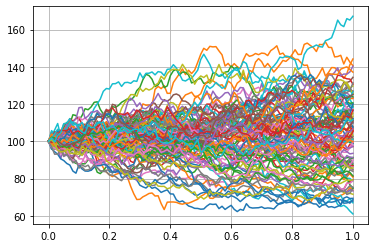

In [3]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [4]:
autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)

In [5]:
bs_model = BSPath(r=.03, sigma=.4, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [6]:
autocall.valuation(traj)

69.27% hit the barrier
Barrier breach at time:
- 0.25 years: 47.54% of the time
- 0.5 years: 11.95% of the time
- 0.75 years: 6.10% of the time
- 1.0 years: 3.68% of the time


(93.90785028694853, 0.1289551055200684)

### Variation with the spot

In [7]:
spots = np.linspace(1, 200, 100)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    bs_model = BSPath(r=.03, sigma=.4, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

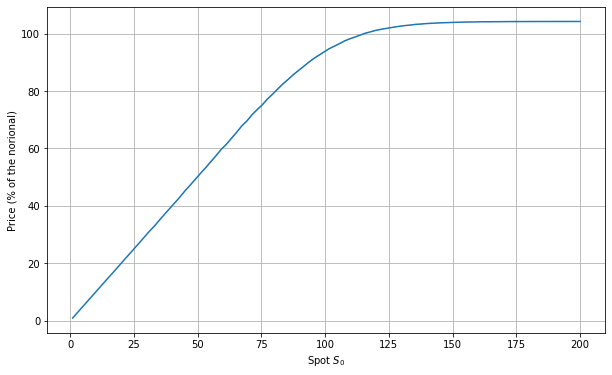

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(spots, prices[::, 0] - prices[::, 1], prices[::, 0] + prices[::, 1])
ax.plot(spots, prices[::, 0])
ax.set_xlabel(r'Spot $S_0$')
ax.set_ylabel(r'Price (% of the norional)')
ax.grid();

In [13]:
# fig.savefig('price_spot_bs.png', dpi=300)

### Variation with the volatility

In [30]:
vols = np.linspace(.001, .5, 80)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

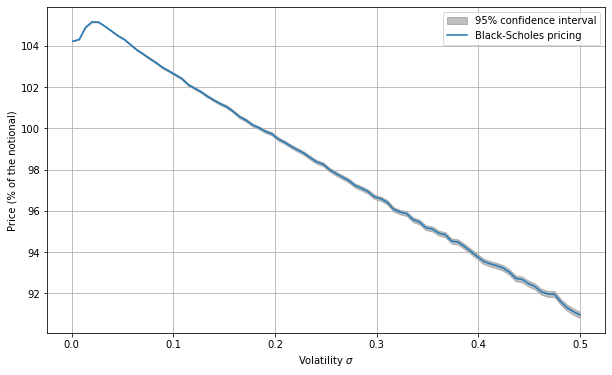

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(
    vols, prices[::, 0] - prices[::, 1], prices[::, 0] + prices[::, 1],
    color='tab:gray', alpha=.5, label=r'95% confidence interval'
)
ax.plot(vols, prices[::, 0], label='Black-Scholes pricing')
ax.set_xlabel(r'Volatility $\sigma$')
ax.set_ylabel(r'Price (% of the notional)')
ax.grid()
ax.legend();

In [35]:
# fig.savefig('price_vol.png', dpi=300)

# Heston pricing

### Trajectory test

In [2]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
traj = heston_model.simulation(100, 1/100, 100)

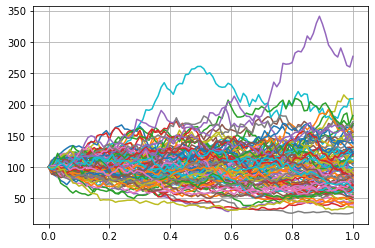

In [3]:
plt.plot(np.arange(101)/100, traj)
plt.grid();

### Autocallable pricing

In [4]:
autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)

In [5]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=20, theta=.2, rho=-.6, sigmav=.3)
traj = heston_model.discrete_observations(4, 25, 1/4, 10**5)

In [6]:
autocall.valuation(traj)

69.10% hit the barrier
Barrier breach at time:
- 0.25 years: 47.78% of the time
- 0.5 years: 11.83% of the time
- 0.75 years: 5.85% of the time
- 1.0 years: 3.64% of the time


(92.8348787017607, 0.13918549771824948)

### Sensitivity with respect to the spot

In [23]:
spots = np.linspace(1, 200, 50)
prices_bs = []
prices_heston = []
for S0 in spots:
    # Heston
    autocall = MonteCarlo(rate=.03, q=.05, barrier=100, freq=.25, mat=1, notional=100)
    heston_model = HestonPath(r=.03, S0=S0, V0=.28, kappa=10, theta=.4, rho=-.6, sigmav=.3)
    traj = heston_model.discrete_observations(4, 10, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices_heston.append(price)
    # BS
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    bs_model = BSPath(r=.03, sigma=.4, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices_bs.append(price)
prices_heston = np.array(prices_heston)
prices_bs = np.array(prices_bs)

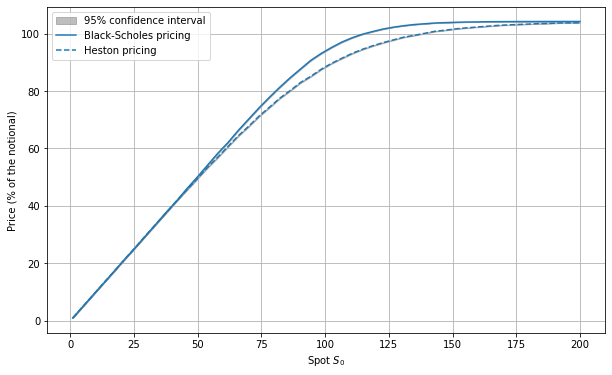

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(
    spots, prices_bs[::, 0] - prices_bs[::, 1], prices_bs[::, 0] + prices_bs[::, 1],
    color='tab:gray', alpha=.5, label=r'95% confidence interval'
)
ax.plot(spots, prices_bs[::, 0], color='tab:blue', label='Black-Scholes pricing')
ax.fill_between(spots, prices_heston[::, 0] - prices_heston[::, 1], prices_heston[::, 0] + prices_heston[::, 1], color='tab:gray', alpha=.5)
ax.plot(spots, prices_heston[::, 0], linestyle='--', color='tab:blue', label='Heston pricing')
ax.set_xlabel(r'Spot $S_0$')
ax.set_ylabel(r'Price (% of the notional)')
ax.grid()
ax.legend();

In [37]:
# fig.savefig('price_spot.png', dpi=300)

### Sensivity to volatility

In [28]:
vols = np.linspace(.001, .5, 50)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    heston_model = HestonPath(r=.03, S0=100, V0=.2, kappa=10, theta=v, rho=-.6, sigmav=.3)
    traj = heston_model.discrete_observations(4, 10, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

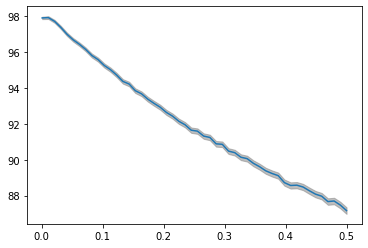

In [29]:
plt.fill_between(vols, prices[::, 0] - prices[::, 1], prices[::, 0] + prices[::, 1], color='tab:gray', alpha=.5)
plt.plot(vols, prices[::, 0])